In [5]:
from bs4 import BeautifulSoup

In [2]:
from selenium import webdriver
driver = webdriver.Chrome("chromedriver.exe")
url = "http://search.danawa.com/dsearch.php?query=무선청소기&tab=main"
driver.get(url)

In [6]:
html = driver.page_source
soup = BeautifulSoup(html,'html.parser')

In [8]:
prod_items = soup.select('li.prod_item')
len(prod_items)

45

In [10]:
prod_items = soup.select('ul.product_list > li.prod_item')
len(prod_items)

45

In [12]:
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
len(prod_items)

44

In [14]:
title = prod_items[0].select('p.prod_name > a')[0].text.strip()
print(title)

LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571


In [15]:
spec_list = prod_items[0].select('div.spec_list')[0].text.strip()
print(spec_list)

핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸이클론 / 스마트인버터모터 / 흡입력: 210W / 소비전력: 590W / [배터리] 분리형 / 리튬이온 (2개) / 충전시간: 4시간 / 사용시간: 1시간(개당) / [필터] 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 알레르기인증(BAF) / 미세먼지인증(SLG) / 색상: 카밍베이지 / 무게: 2.6kg / 먼지통자동비움 / 크기(가로x세로x깊이): 250x1120x260mm


In [16]:
price = prod_items[0].select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",","")
print(price)

1202000


In [43]:
prod_data = []
for prod_item in prod_items:
    try: # ① 상품명 가져오기
        title = prod_item.select('p.prod_name > a')[0].text.strip()
    except:
        title = ''
    try: # ② 스펙 목록 가져오기
        spec_list = prod_item.select('div.spec_list')[0].text.strip()
    except:
        spec_list = ''
    try: # ③ 가격 정보 가져오기 
        price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",","")
    except:
        price = 0
    prod_data.append([title, spec_list, price])
    
print(len(prod_data))
print(prod_data)

44
[['DIBEA X30', '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / [성능] 싸이클론 / BLDC모터 / 흡입력: 25000Pa / 소비전력: 400W / [배터리] 분리형 / 리튬이온 / 용량: 2000mAh / 충전시간: 2~3시간 / 사용시간: 50분(개당) / [필터] 헤파필터 / H13급 / [기능] LED라이트 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 거치대 / [부가] 먼지통용량: 0.5L / 색상: 블루 / 무게: 2.5kg / 크기(가로x세로x깊이): 256x1172x217mm', '188000'], ['코칸 차량용 무선 진공 핸디 청소기 CHC-UY01', '차량용청소기 / 무선 / 흡입력: 5,800Pa / 헤파필터 / 추가노즐: 솔브러쉬 / 크기: 70x290mm / 무게: 560g', '61870'], ['미로 MPW10', '물걸레청소기 / 물걸레+진공 / 회전식 / 무선형 / 배터리: 리튬이온 / 용량: 2500mAh / 충전시간: 7시간 / 사용시간: 1시간40분(개당) / [기능] LED라이트 / 각도조절 / 셀프스탠딩 / 배터리잔량표시 / 프리볼트 / 싸이클론 / BLDC모터 / 헤파필터 / 5단계여과 / 소비전력: 450W / [부가] 색상: 화이트골드 / 무게: 3kg / 패드: 극세사(벨크로형) / 크기(가로x세로x깊이): 410x1100x225mm', '449090'], ['쿠쿠전자 인스퓨어 파워클론 CVC-A1410UG', '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / [성능] 싸이클론 / BLDC모터 / 흡입력: 140AW / 흡입력: 23000Pa / 소비전력: 420W / [배터리] 분리형 / 리튬이온 / 사용시간: 35분(개당) / [필터] 헤파필터 / H13급 / 5단계여과 / [기능] 먼지감지센서 / 배터리잔량표시 / [구성] 바닥 / 침구 / 솔형 / 틈새 / 연장툴 / 거치대 / [부가] 색상: 어반그레이 / 무게: 1.82kg / 크기(가로x세로x깊이): 

In [50]:
def get_prod_items(prod_items):
    prod_data = []
    
    for prod_item in prod_items:
        # ① 상품명 가져오기
        try:
            title = prod_item.select('p.prod_name > a')[0].text.strip()
        except:
            title = ''
        # ② 스펙 목록 가져오기
        try: 
            spec_list = prod_item.select('div.spec_list')[0].text.strip()
        except:
            spec_list = ''
        # ③ 가격 정보 가져오기 
        try: 
            price = int(prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(",",""))
        except:
            price = 0
        prod_data.append([title, spec_list, price])
        
    return prod_data

In [51]:
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item')
prod_data = get_prod_items(prod_items)
print(len(prod_data))

44


In [52]:
def get_search_page_url(keyword, page):
    return 'http://search.danawa.com/dsearch.php?query={}&volumeType=allvs&page={}&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods'.format(keyword, page)

keyword = '무선청소기'
page = 1
url = get_search_page_url(keyword, page)
print(url)

http://search.danawa.com/dsearch.php?query=무선청소기&volumeType=allvs&page=1&limit=30&sort=saveDESC&list=list&boost=true&addDelivery=N&tab=goods&tab=goods


In [53]:
import time
from tqdm import tqdm_notebook
total_page = 10
for page in tqdm_notebook(range(1, total_page + 1)):
    time.sleep(5)

<ipython-input-53-afe5f87ab986>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1, total_page + 1)):


In [54]:
from selenium import webdriver
import time
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook

driver = webdriver.Chrome('chromedriver.exe')
driver.implicitly_wait(3)

keyword = '무선청소기'
total_page = 10
prod_data_total = []
for page in tqdm_notebook(range(1, total_page + 1)):
    # ① 검색 페이지 이동
    url = get_search_page_url(keyword, page)
    driver.get(url)
    time.sleep(5)
    
    # ② 현재 페이지의 HTML 정보 가져오기
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    # ③ 상품 정보 추출
    prod_items = soup.select('div#productListArea > div.main_prodlist > ul.product_list > li.prod_item')
    prod_item_list = get_prod_items(prod_items)
    
    # ④ 추출 데이터 저장
    prod_data_total = prod_data_total + prod_item_list

<ipython-input-54-d5838cc6f609>:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1, total_page + 1)):


In [55]:
import pandas as pd
data = pd.DataFrame(prod_data_total)
data.columns = ['상품명', '스펙 목록', '가격']
data.to_excel('1_danawa_crawling_result.xlsx', index = False)

### 데이터 전처리

In [67]:
import pandas as pd
data = pd.read_excel('1_danawa_crawling_result.xlsx')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   상품명     400 non-null    object
 1   스펙 목록   400 non-null    object
 2   가격      400 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 9.5+ KB


,상품명,스펙 목록,가격
0,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,1202000
1,샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",50960
2,샤오미 미지아 차량용 핸디 무선 청소기 (해외구매),"차량용청소기 / 무선 / 흡입력: 13,000Pa / 최대출력: 120W / 헤파필...",35500
3,샤오미 드리미 V10,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입전용 / [성능] 멀티싸이클론 /...,138270
4,LG전자 코드제로 A9 A9100S,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 2중터보싸...,473837


In [68]:
data['상품명'][:10]

0     LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571
1    샤오미 CLEANFLY 차량용 무선 청소기 3세대 (해외구매)
2          샤오미 미지아 차량용 핸디 무선 청소기 (해외구매)
3                           샤오미 드리미 V10
4                   LG전자 코드제로 A9 A9100S
5               삼성전자 비스포크 제트 VS20A956A3
6                        에코백스 디봇 오즈모 T9
7             LG전자 코드제로 ThinQ A9S A9470
8                  샤오미 TROUVER POWER 11
9              일렉트로룩스 WELL Q6 WQ61-1OGG
Name: 상품명, dtype: object

In [69]:
data = data.dropna(axis=0)

In [70]:
title = "LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571"
info = title.split(' ',1)
print(info)

['LG전자', '오브제컬렉션 코드제로 ThinQ A9S AO9571']


In [71]:
# 중간중간 상품명 오류와 빈칸은 직접 제거 전처리함
company_list = []
product_list = []
for title in data['상품명']:
    title_info = title.split(' ', 1)
    company_name = title_info[0]
    product_name = title_info[1]
    company_list.append(company_name)
    product_list.append(product_name)

In [72]:
spec_list = data['스펙 목록'][0].split(' / ')
spec_list

['핸디/스틱청소기',
 '핸디+스틱형',
 '무선형',
 '흡입+걸레겸용',
 '[성능] 2중터보싸이클론',
 '스마트인버터모터',
 '흡입력: 210W',
 '소비전력: 590W',
 '[배터리] 분리형',
 '리튬이온 (2개)',
 '충전시간: 4시간',
 '사용시간: 1시간(개당)',
 '[필터] 헤파필터',
 'H13급',
 '5단계여과',
 '[기능] 자동물공급',
 '배터리잔량표시',
 'IoT기능',
 '[구성] 바닥',
 '물걸레',
 '침구',
 '솔형',
 '틈새',
 '올인원타워',
 '[부가] 알레르기인증(BAF)',
 '미세먼지인증(SLG)',
 '색상: 카밍베이지',
 '무게: 2.6kg',
 '먼지통자동비움',
 '크기(가로x세로x깊이): 250x1120x260mm']

In [73]:
category = spec_list[0] 
category

'핸디/스틱청소기'

In [74]:
for spec in spec_list:
    if '사용시간' in spec: 
         use_time_spec = spec 
    elif '흡입력' in spec:
        suction_spec = spec
        
print(use_time_spec)
print(suction_spec)

사용시간: 1시간(개당)
흡입력: 210W


In [75]:
use_time_value = use_time_spec.split(' ')[1].strip() 
suction_value = suction_spec.split(' ')[1].strip()

print(use_time_value)
print(suction_value)

1시간(개당)
210W


In [76]:
category_list = []
use_time_list = []
suction_list = [] 

for spec_data in data['스펙 목록']:
    # ' / ' 기준으로 스펙 분리하기 
    spec_list = spec_data.split(' / ')
    
    # 카테고리 추출하기
    category = spec_list[0] 
    category_list.append(category)
    
    # 사용시간, 흡입력 추출 
    ## 사용시간, 흡입력 정보가 없는 제품을 위해 변수를 생성 
    use_time_value = None 
    suction_value = None 
    
    ## spec_list의 각 원소에서 사용시간, 흡입력 수치 추출
    for spec in spec_list:
        if '사용시간' in spec: 
            use_time_value = spec.split(' ')[1].strip()             
        if '흡입력' in spec:
            suction_value = spec.split(' ')[1].strip() 
    use_time_list.append(use_time_value)
    suction_list.append(suction_value)

In [77]:
print("카테고리", len(category_list), category_list[0:5])
print("사용시간", len(use_time_list), use_time_list[0:5])
print("흡입력", len(suction_list), suction_list[0:5])

카테고리 400 ['핸디/스틱청소기', '차량용청소기', '차량용청소기', '핸디/스틱청소기', '핸디/스틱청소기']
사용시간 400 ['1시간(개당)', '25분', '9~30분', '1시간(개당)', '40분(개당)']
흡입력 400 ['210W', '16,800Pa', '13,000Pa', '22000Pa', '140W']


### 사용시간, 흡입력 단위 통일

In [78]:
def convert_time_minute(time):
    try:
        if '시간' in time:
            hour = time.split('시간')[0]
            if '분' in time:
                minute = time.split('시간')[-1].split('분')[0]
            else:
                minute = 0
        else: 
            hour = 0
            minute = time.split('분')[0]
        return int(hour)*60 + int(minute)
    except:
        return None

In [79]:
times = ["40분", "4분", "1시간", "3시간30분", "4시간"]
for time in times:
    time_value = convert_time_minute(time)
    print(time, "=", time_value)

40분 = 40
4분 = 4
1시간 = 60
3시간30분 = 210
4시간 = 240


In [80]:
new_use_time_list = []
for time in use_time_list:
    value = convert_time_minute(time)
    new_use_time_list.append(value)
    
print(len(new_use_time_list))
print(new_use_time_list[0:10])

400
[60, 25, None, 60, 40, 60, 180, 60, 60, 45]


In [83]:
def get_suction(value):
    try:
        value = value.upper()
        if "AW" in value or "W" in value:
            result = value.replace("A", "").replace("W","")
            result = int(result.replace(",",""))
        elif "PA" in value:
            result = value.replace("PA","")
            result = int(result.replace(",",""))/100
        else:
            result = None
        return result
    except:
        return None

In [84]:
new_suction_list = []
for power in suction_list:
    value = get_suction (power)
    new_suction_list.append(value)

print(len(new_suction_list))
print(new_suction_list[0:10])

400
[210, 168.0, 130.0, 220.0, 140, 210, None, None, None, None]


In [87]:
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격']
pd_data['사용시간'] = new_use_time_list
pd_data['흡입력'] = new_suction_list
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1202000,60.0,210.0
1,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 3세대 (해외구매),50960,25.0,168.0
2,차량용청소기,샤오미,미지아 차량용 핸디 무선 청소기 (해외구매),35500,NaN,130.0
3,핸디/스틱청소기,샤오미,드리미 V10,138270,60.0,220.0
4,핸디/스틱청소기,LG전자,코드제로 A9 A9100S,473837,40.0,140.0


In [88]:
pd_data['카테고리'].value_counts()

핸디/스틱청소기    291
차량용청소기       37
물걸레청소기       37
욕실청소기        21
침구청소기         9
로봇청소기         4
업소용청소기        1
Name: 카테고리, dtype: int64

In [89]:
pd_data_final = pd_data[pd_data['카테고리'].isin(['핸디/스틱청소기'])]
len(pd_data_final)

291

In [90]:
pd_data_final.to_excel('2_danawa_data_final.xlsx', index = False)

### 모델별 비교분석

In [91]:
import pandas as pd
danawa_data = pd.read_excel('2_danawa_data_final.xlsx')
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1202000,60.0,210.0
1,핸디/스틱청소기,샤오미,드리미 V10,138270,60.0,220.0
2,핸디/스틱청소기,LG전자,코드제로 A9 A9100S,473837,40.0,140.0
3,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,719380,60.0,210.0
4,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S A9470,764390,60.0,NaN


In [92]:
top_list = danawa_data.sort_values(["흡입력"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
137,핸디/스틱청소기,리하스,LH20,299000,120.0,330.0
231,핸디/스틱청소기,퍼피유,T12R,279210,60.0,290.0
31,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,248000,48.0,290.0
210,핸디/스틱청소기,작스제로,XAX 0,234870,40.0,290.0
188,핸디/스틱청소기,캐치웰,NEW F8,188060,25.0,290.0


In [93]:
top_list = danawa_data.sort_values(["사용시간"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
137,핸디/스틱청소기,리하스,LH20,299000,120.0,330.0
123,핸디/스틱청소기,샤오미,드리미 V12,318990,90.0,270.0
226,핸디/스틱청소기,샤오미,드리미 T30,429950,90.0,270.0
141,핸디/스틱청소기,샤오미,드리미 V11,242950,90.0,250.0
238,핸디/스틱청소기,로보락,H6,436810,90.0,250.0


In [94]:
top_list = danawa_data.sort_values(["사용시간","흡입력"], ascending = False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
137,핸디/스틱청소기,리하스,LH20,299000,120.0,330.0
123,핸디/스틱청소기,샤오미,드리미 V12,318990,90.0,270.0
226,핸디/스틱청소기,샤오미,드리미 T30,429950,90.0,270.0
141,핸디/스틱청소기,샤오미,드리미 V11,242950,90.0,250.0
238,핸디/스틱청소기,로보락,H6,436810,90.0,250.0


In [98]:
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
print("가격 평균값 : ", price_mean_value)
print("흡입력 평균값 : ", suction_mean_value)
print("사용시간 평균값 : ", use_time_mean_value)

가격 평균값 :  417756.5704467354
흡입력 평균값 :  179.03763440860214
사용시간 평균값 :  44.15217391304348


In [96]:
condition_data = danawa_data [
    (danawa_data['가격'] <= price_mean_value) & 
    (danawa_data['흡입력'] >= suction_mean_value) & 
    (danawa_data['사용시간'] >= use_time_mean_value)]
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
1,핸디/스틱청소기,샤오미,드리미 V10,138270,60.0,220.0
19,핸디/스틱청소기,샤오미,드리미 V9P,136760,60.0,200.0
20,핸디/스틱청소기,샤오미,드리미 V9,108760,60.0,200.0
31,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,248000,48.0,290.0
33,핸디/스틱청소기,샤오미,드리미 V10P,236150,60.0,220.0
54,핸디/스틱청소기,샤오미,SHUNZAO Z11,144380,60.0,260.0
57,핸디/스틱청소기,원더스리빙,원더스 다이나킹 Z9,299000,65.0,220.0
59,핸디/스틱청소기,샤오미,SHUNZAO Z11 PRO,199000,60.0,260.0
77,핸디/스틱청소기,샤오미,드리미 T20,377010,70.0,250.0
107,핸디/스틱청소기,샤오미,로이드미 제로,216380,60.0,220.0


In [103]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform 
font_path = ''
if platform.system() == 'Windows': 
    font_path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = font_path).get_name()
    rc('font', family = font_name)
elif platform.system() == 'Darwin':
    font_path = '/Users/$USER/Library/Fonts/AppleGothic.ttf'
    rc('font', family = 'AppleGothic')
else: 
    print('Check your OS system')
    
%matplotlib inline

In [107]:
chart_data = danawa_data.dropna(axis = 0)
len(chart_data)

183

In [110]:
suction_max_value = chart_data['흡입력'].max()
suction_min_value = chart_data['흡입력'].min()
suction_mean_value = chart_data['흡입력'].mean()

use_time_min_value = chart_data['사용시간'].min()
use_time_max_value = chart_data['사용시간'].max()
use_time_mean_value = chart_data['사용시간'].mean()

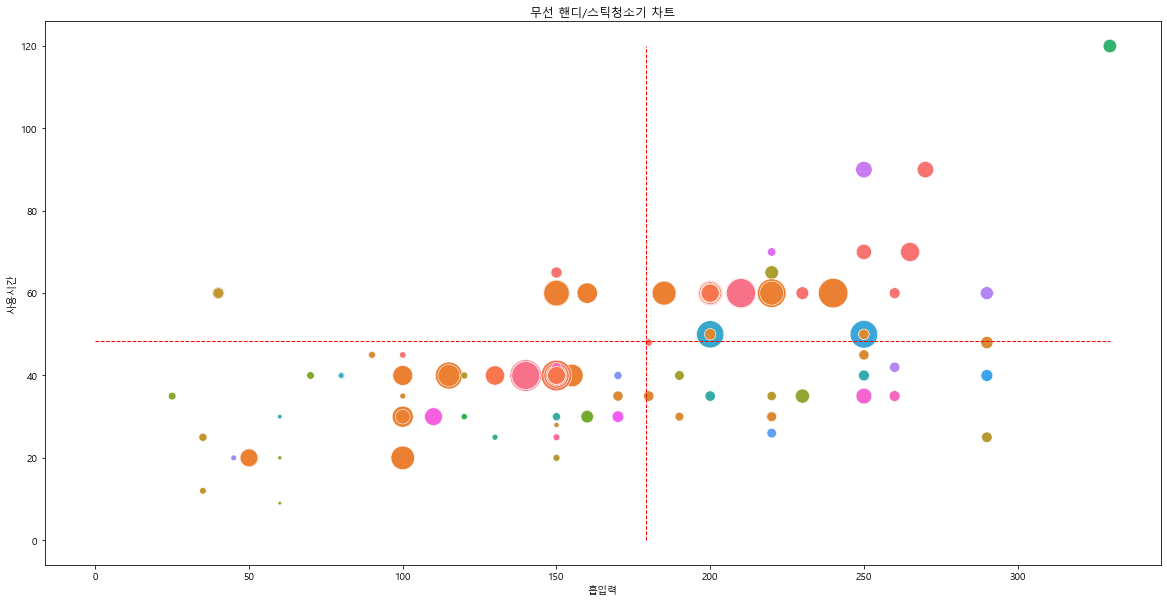

In [112]:
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 차트")
sns.scatterplot(x = '흡입력', y = '사용시간', size = '가격', hue = chart_data['회사명'], 
             data = chart_data, sizes = (10, 1000), legend = False)
plt.plot([0, suction_max_value], 
          [use_time_mean_value, use_time_mean_value], 
          'r--', 
          lw = 1 )
plt.plot([suction_mean_value, suction_mean_value], 
          [0, use_time_max_value], 
          'r--', 
          lw = 1 )
plt.show()

In [114]:
chart_data_selected = chart_data[:20]
len(chart_data_selected)

20

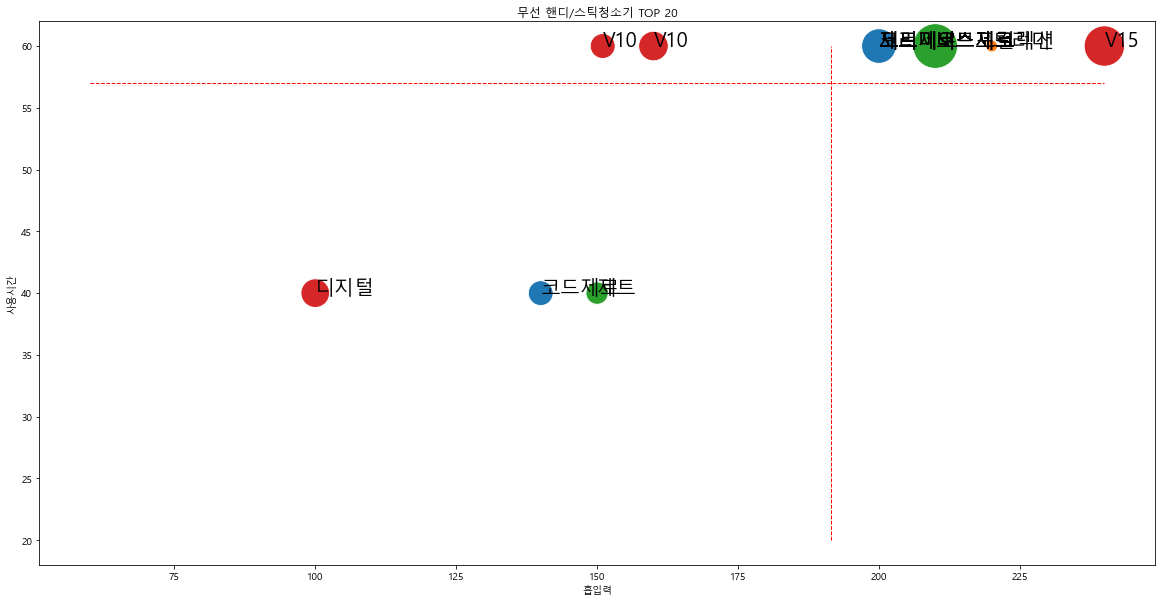

In [115]:
suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()
plt.figure(figsize=(20, 10))
plt.title("무선 핸디/스틱청소기 TOP 20")
sns.scatterplot(x = '흡입력', 
                  y = '사용시간', 
                  size = '가격', 
                  hue = chart_data_selected['회사명'], 
                  data = chart_data_selected, sizes = (100, 2000),
                  legend = False)
plt.plot([60, suction_max_value], 
          [use_time_mean_value, use_time_mean_value], 
          'r--', 
          lw = 1 )
plt.plot([suction_mean_value, suction_mean_value], 
          [20, use_time_max_value], 
          'r--', 
          lw = 1 )
for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=20)
plt.show()